<a href="https://colab.research.google.com/github/adityakalra581/Data-Science/blob/master/Flipr_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [0]:
train = pd.read_excel("Train_dataset.xlsx")
test = pd.read_excel("Test_dataset.xlsx")


In [57]:
train.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [58]:
test.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,1,Diabetes,52,3,<200,Stage-01,388,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,1,Diabetes,53,11,<200,Stage-01,409,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,1,Diabetes,35,9,<100,Stage-02,440,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,1,None,31,12,<300,Elevated,206,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,1,Diabetes,51,6,<200,Stage-01,229,109,207,312,94,68,39,5,2300000,1500000,1


## EDA on Training and Testing Data

In [59]:
print(train.shape)
print(train.nunique())

(10714, 28)
people_ID                 10714
Region                        5
Gender                        2
Designation                   2
Name                       6304
Married                       2
Children                      3
Occupation                    9
Mode_transport                3
cases/1M                      4
Deaths/1M                     3
comorbidity                   4
Age                          53
Coma score                   13
Pulmonary score               4
cardiological pressure        4
Diuresis                    341
Platelets                   146
HBB                         191
d-dimer                     151
Heart rate                   51
HDL cholesterol              36
Charlson Index               41
Blood Glucose                 5
Insurance                    48
salary                       21
FT/month                      3
Infect_Prob                8724
dtype: int64


In [60]:
## Estimating Missing Values in Dataset
train.isnull().sum()

people_ID                    0
Region                       0
Gender                       0
Designation                  0
Name                        20
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [61]:
test.isnull().sum()

people_ID                  0
Region                     0
Gender                     0
Designation                0
Name                      32
Married                    0
Children                   0
Occupation                 0
Mode_transport             0
cases/1M                   0
Deaths/1M                  0
comorbidity                0
Age                        0
Coma score                 0
Pulmonary score            0
cardiological pressure     0
Diuresis                   0
Platelets                  0
HBB                        0
d-dimer                    0
Heart rate                 0
HDL cholesterol            0
Charlson Index             0
Blood Glucose              0
Insurance                  0
salary                     0
FT/month                   0
dtype: int64

**Insights**
- Clearly test data is clean and ready nut training data need
some preprocessing.
- Also there are lot of Mising Values in Names in both the data, and Probability will not be dependent on name, so i'll drop the names from both the data from Modelling and Fitting.  

In [62]:
train['Children'].value_counts()

2.0    3829
1.0    3398
0.0    3176
Name: Children, dtype: int64

In [63]:
## Let's See Occupation

train['Occupation'].value_counts()

Legal            1174
Sales            1131
Manufacturing    1120
Researcher       1115
Farmer           1113
Cleaner          1111
Clerk            1078
Driver           1072
Business         1053
Name: Occupation, dtype: int64

In [64]:
train['Occupation'].isnull().sum()

747

## EDA on Children Feature

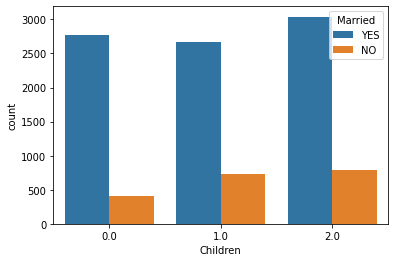

In [65]:
sns.countplot(x='Children',hue='Married',data=train)

- There is no conclusive evidence that Not Married person doesn't have a child or Married person definitely have a child.

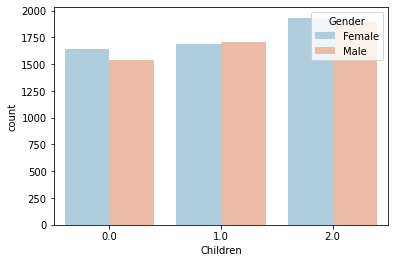

In [66]:
sns.countplot(x='Children',hue='Gender',data=train,palette='RdBu_r')

- Nothing Interesting. Almost similar for all Categories.

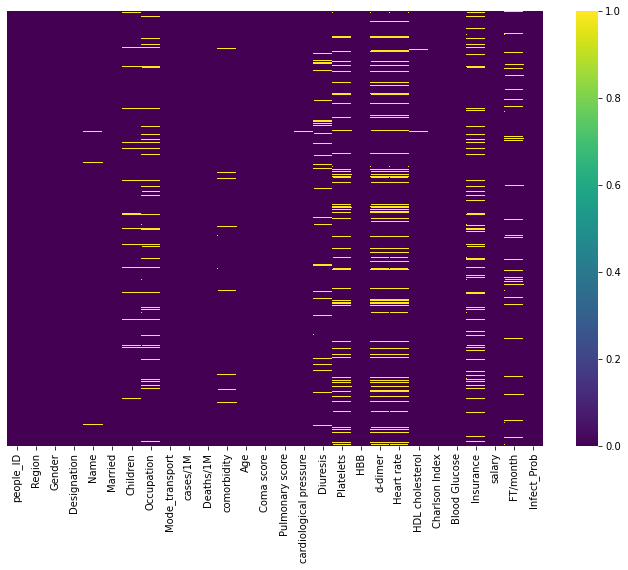

In [67]:
## Let's Visualize the Missing Values.

dims = (12,8)
fig,ax = plt.subplots(figsize=dims)
sns.heatmap(train.isnull(),cbar=True,yticklabels=False,cmap='viridis',ax=ax)

## Try the cmap="YlGnBu" for different style


**Visualizing Missing Values**

- The Above Visual displays the missing Values in different Columns and different Positions.
- The Horizontal line is a sign of missing Value.
- [Seaborn Heatmap Docs](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [68]:
## As there are no definite answers on how to impute missing Values in Children column
## I am gonna go with the Mode.

train['Children'].fillna(2,inplace=True)
train['Children'].value_counts()

2.0    4140
1.0    3398
0.0    3176
Name: Children, dtype: int64

In [69]:
print("Missing Values in Mode_Transport Column:",train['Mode_transport'].isnull().sum())
print()
train['Mode_transport'].value_counts()

Missing Values in Mode_Transport Column: 3



Public    3588
Walk      3568
Car       3555
Name: Mode_transport, dtype: int64

In [70]:
## As the missing values are only three will go with mode again.

train['Mode_transport'].fillna('Public',inplace=True)
train['Mode_transport'].value_counts()

Public    3591
Walk      3568
Car       3555
Name: Mode_transport, dtype: int64

**OCCUPATION**

- Missing Value = 747
- Categories    =  9

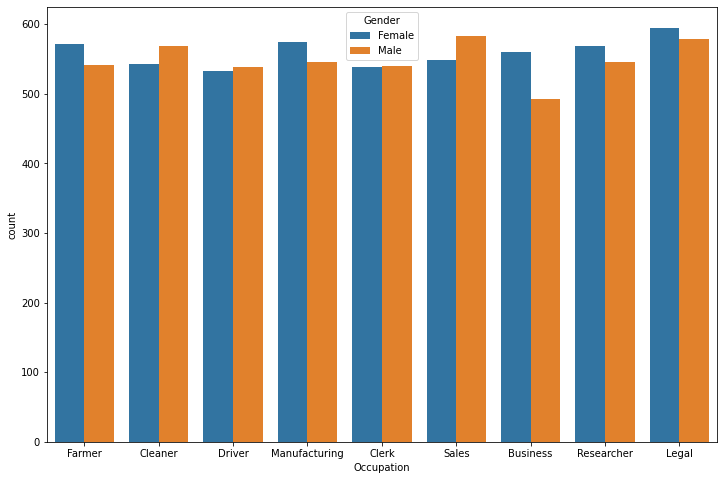

In [71]:
dims=(12,8)
fig,ax = plt.subplots(figsize=dims)
sns.countplot(x='Occupation',hue='Gender',data=train,ax=ax)


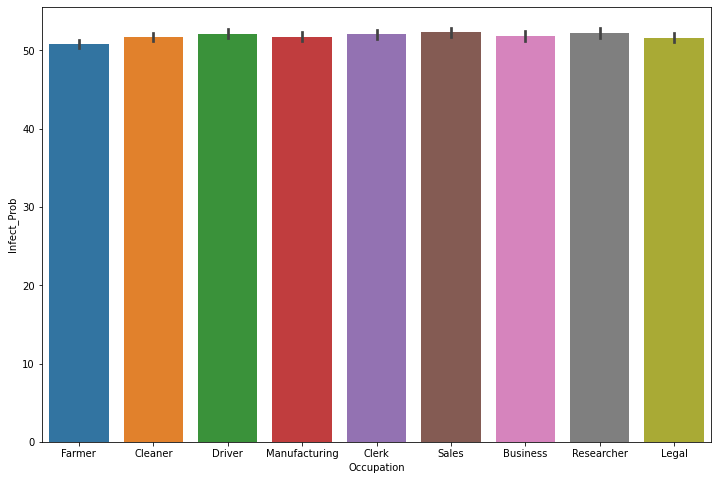

In [72]:
dims=(12,8)
fig,ax = plt.subplots(figsize=dims)
sns.barplot(x='Occupation',y='Infect_Prob',data=train,ax=ax)


In [73]:
train.describe()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
count,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,9998.000000,9790.000000,10698.000000,9600.000000,9600.000000,10679.000000,10714.000000,10714.000000,9.624000e+03,1.071400e+04,9991.000000,10714.000000
mean,10084.893784,1.089976,3.285888,0.523241,42.083722,9.013067,278.806261,87.795812,116.170967,275.292292,74.847396,52.632737,20.028094,5.015027,2.644919e+06,1.304713e+06,1.004604,52.280680
std,7108.663645,0.821470,2.721274,0.854303,15.323397,3.714970,97.985526,41.851103,55.178811,43.669692,14.869104,10.434293,11.828445,1.399770,1.383346e+06,6.075947e+05,0.815257,10.674667
min,1.000000,0.000000,1.000000,0.000000,16.000000,3.000000,110.000000,15.000000,20.000000,200.000000,50.000000,35.000000,0.000000,3.000000,3.000000e+05,3.000000e+05,0.000000,29.289600
25%,2679.250000,0.000000,2.000000,0.000000,29.000000,6.000000,194.000000,52.000000,68.000000,237.000000,62.000000,44.000000,10.000000,4.000000,1.400000e+06,8.000000e+05,0.000000,47.277426
50%,10003.500000,1.000000,2.000000,0.000000,42.000000,9.000000,276.000000,88.000000,117.000000,276.000000,75.000000,53.000000,20.000000,5.000000,2.600000e+06,1.300000e+06,1.000000,49.008389
75%,15141.750000,2.000000,4.000000,1.000000,55.000000,12.000000,364.000000,124.000000,165.000000,313.000000,88.000000,62.000000,30.000000,6.000000,3.800000e+06,1.800000e+06,2.000000,52.762313
max,22695.000000,2.000000,8.000000,2.000000,68.000000,15.000000,450.000000,160.000000,210.000000,350.000000,100.000000,70.000000,40.000000,7.000000,5.000000e+06,2.300000e+06,2.000000,97.632000


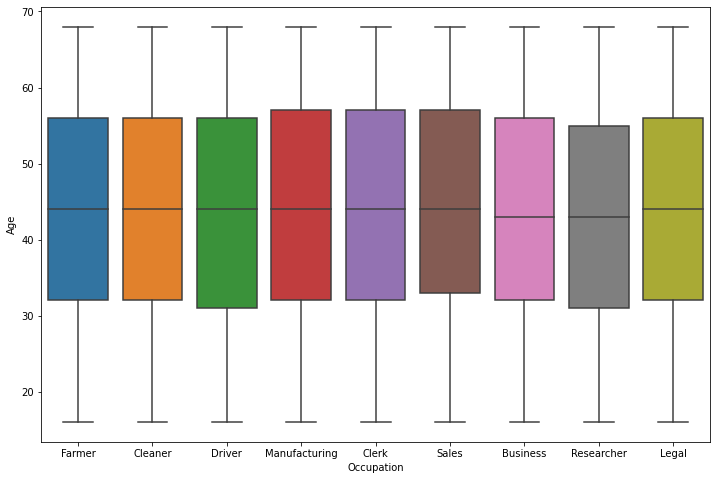

In [74]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Occupation',y='Age',data=train)

**Comorbidity**

- Missing Values = 226

- Classes  = 4

In [75]:
train['comorbidity'].value_counts()

Hypertension              2642
None                      2637
Diabetes                  2614
Coronary Heart Disease    2595
Name: comorbidity, dtype: int64

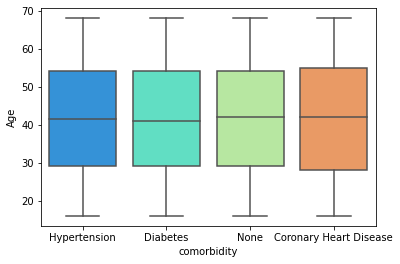

In [76]:
sns.boxplot(x='comorbidity',y='Age',data=train,palette='rainbow')

In [77]:
train['Region'].value_counts()

Chennai         2581
Bengaluru       2573
Chandigarh      2563
Bhubaneshwar    2537
Delhi            460
Name: Region, dtype: int64

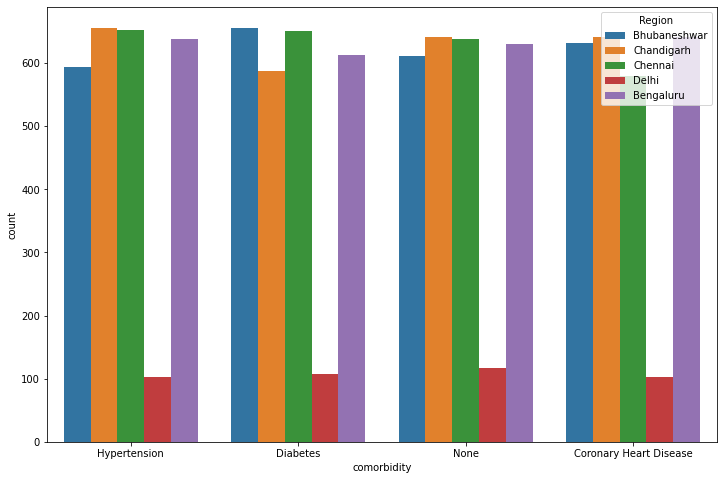

In [78]:
plt.figure(figsize=(12,8))
sns.countplot(x='comorbidity',hue='Region',data=train)

- As there is no other feature that provide comorbidity, i will use Region for filling the missing values.
- People belonging to Bhubaneshwar will be given value Diabetes.
- Else: all will be given Chandigarh

In [0]:
def impute_comorbidity(cols):
    comorbidity = cols[0]
    Region = cols[1]
    
    if pd.isnull(comorbidity):

        if Region == "Bhubaneshwar" or "Chennai":
            return "Diabetes"

        elif Region == "Bangalore":
            return "Coronary Heart Disease"

        elif Region == "Chandigarh":
            return "Hypertension"      
        
        else:
            return "None"

    else:
        return comorbidity

In [0]:
train['comorbidity'] = train[['comorbidity','Region']].apply(impute_comorbidity,axis=1)

In [81]:
train.columns

Index(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M', 'Deaths/1M',
       'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'Insurance', 'salary', 'FT/month', 'Infect_Prob'],
      dtype='object')

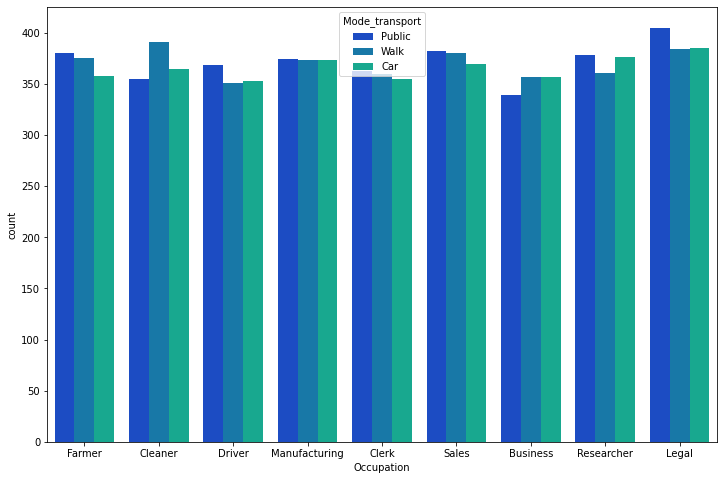

In [82]:
plt.figure(figsize=(12,8))
sns.countplot(x='Occupation',hue='Mode_transport',data=train,palette='winter')

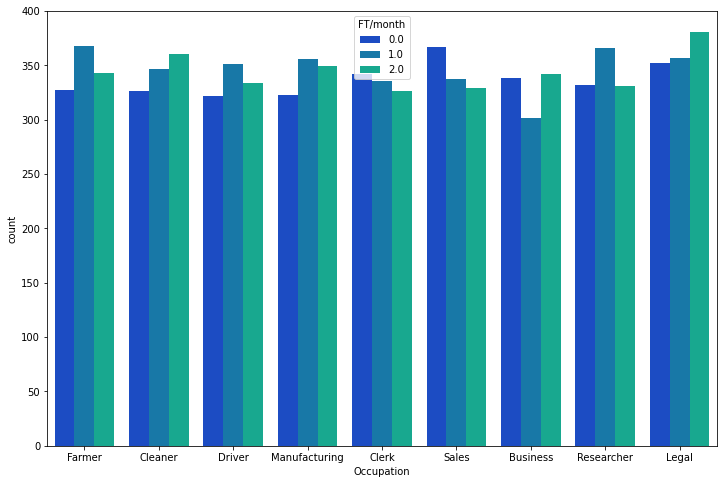

In [83]:
plt.figure(figsize=(12,8))
sns.countplot(x='Occupation',hue='FT/month',data=train,palette='winter')

**Diuresis Column**

- Missing Values = 716
- Mean = 276.00

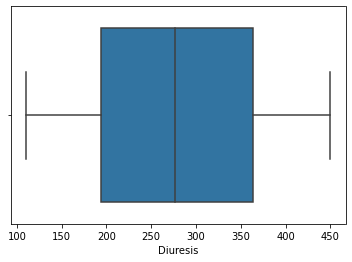

In [84]:
sns.boxplot(x='Diuresis',data=train)

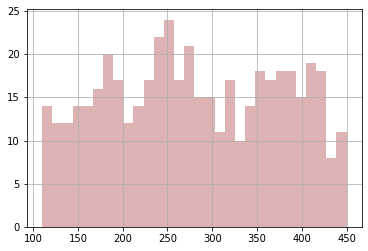

In [85]:
temp=train['Diuresis'].head(500)
temp.hist(bins=30,color='darkred',alpha=0.3)


- Diuresis is somehow normally distributed.
- Let's fill the missing values with mean.
 

**Platelets**

- Missing Value = 924


In [86]:
train['Platelets'].describe()

count    9790.000000
mean       87.795812
std        41.851103
min        15.000000
25%        52.000000
50%        88.000000
75%       124.000000
max       160.000000
Name: Platelets, dtype: float64

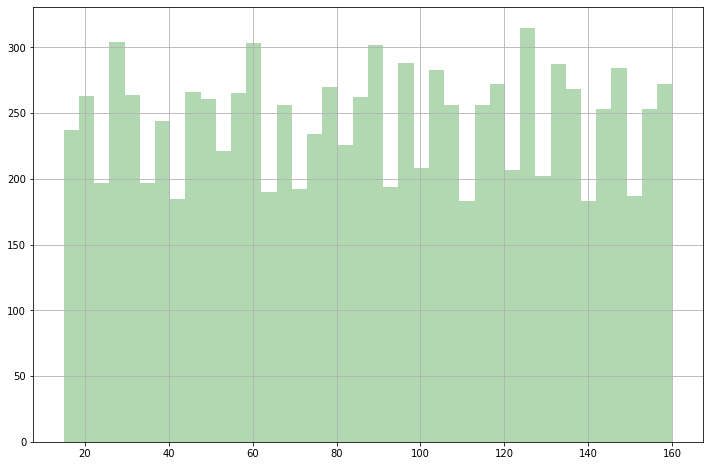

In [87]:
train['Platelets'].hist(bins=40,color='green',alpha=0.3,figsize=(12,8))

- Distribution is quite Uniform so we can fill the missing values by mean.

**HBB Column**

- Missing Value = 16

In [88]:
train['HBB'].describe()

count    10698.000000
mean       116.170967
std         55.178811
min         20.000000
25%         68.000000
50%        117.000000
75%        165.000000
max        210.000000
Name: HBB, dtype: float64

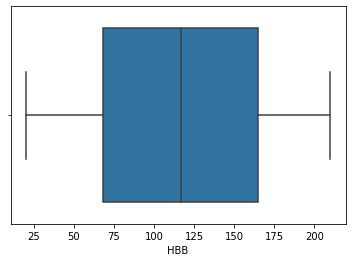

In [89]:
sns.boxplot(x='HBB',data=train)

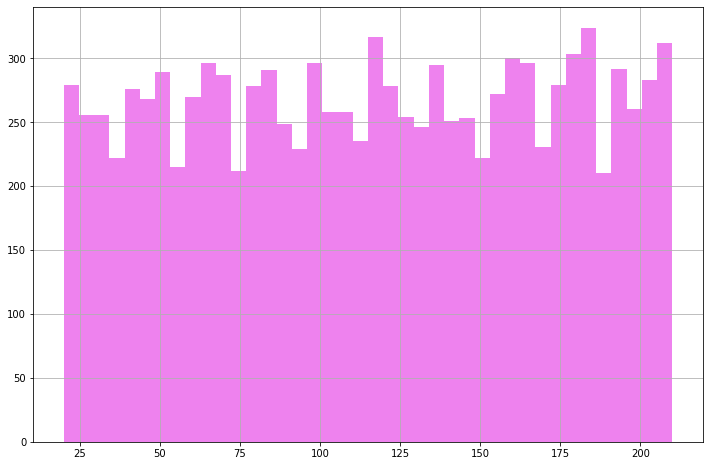

In [90]:
train['HBB'].hist(bins=40,color='violet',figsize=(12,8))

In [91]:
train.dtypes

people_ID                   int64
Region                     object
Gender                     object
Designation                object
Name                       object
Married                    object
Children                  float64
Occupation                 object
Mode_transport             object
cases/1M                    int64
Deaths/1M                   int64
comorbidity                object
Age                         int64
Coma score                  int64
Pulmonary score            object
cardiological pressure     object
Diuresis                  float64
Platelets                 float64
HBB                       float64
d-dimer                   float64
Heart rate                float64
HDL cholesterol           float64
Charlson Index              int64
Blood Glucose               int64
Insurance                 float64
salary                      int64
FT/month                  float64
Infect_Prob               float64
dtype: object

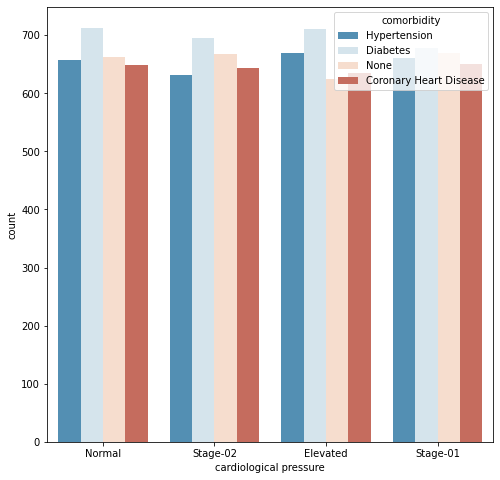

In [92]:
plt.figure(figsize=(8,8))
sns.countplot(x='cardiological pressure',hue='comorbidity',data=train,palette='RdBu_r')

In [93]:
train.columns

Index(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M', 'Deaths/1M',
       'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'Insurance', 'salary', 'FT/month', 'Infect_Prob'],
      dtype='object')

In [0]:
# ## FILLED WITH MEAN
train['HBB'].fillna(117.000000,inplace=True)
train['Platelets'].fillna(88.000000,inplace=True)
train['Diuresis'].fillna(276.0000,inplace=True)
train['d-dimer'].fillna(276.000000,inplace=True)
train['Heart rate'].fillna(75.000000,inplace=True)
train['HDL cholesterol'].fillna(53.0000000,inplace=True)
train['Insurance'].fillna(2.600000e+06,inplace=True)

# train.fillna(train.mean,inplace=True)

## MEAN OF VARIOUS COLUMNS:

# Diuresis: 276.000000	
# Platelets: 88.000000
# HBB :	117.000000
# d-dimer :	276.000000
# Heart rate :	75.000000
# HDL cholestrol :	53.000000
# Insurance : 2.600000e+06


## FILLED WITH MODE
train['cardiological pressure'].fillna('Normal',inplace=True) 
train['FT/month'].fillna(2.0,inplace=True)
train['Occupation'].fillna('Legal',inplace=True)




In [95]:
train.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,276.0,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [96]:
train.isnull().sum()

people_ID                  0
Region                     0
Gender                     0
Designation                0
Name                      20
Married                    0
Children                   0
Occupation                 0
Mode_transport             0
cases/1M                   0
Deaths/1M                  0
comorbidity                0
Age                        0
Coma score                 0
Pulmonary score            0
cardiological pressure     0
Diuresis                   0
Platelets                  0
HBB                        0
d-dimer                    0
Heart rate                 0
HDL cholesterol            0
Charlson Index             0
Blood Glucose              0
Insurance                  0
salary                     0
FT/month                   0
Infect_Prob                0
dtype: int64

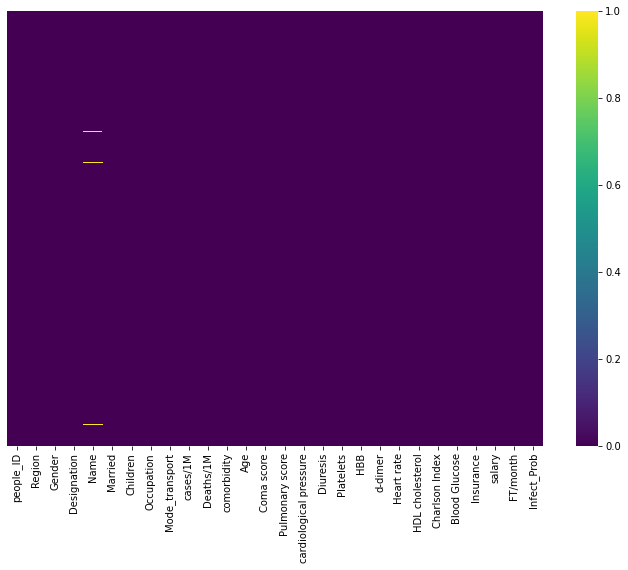

In [97]:
## Let's Visualize the Missing Values.

dims = (12,8)
fig,ax = plt.subplots(figsize=dims)
sns.heatmap(train.isnull(),cbar=True,yticklabels=False,cmap='viridis',ax=ax)

## Try the cmap="YlGnBu" for different style


### One Hot Encoding:

**Converting Categorical Features into Numerical**

In [98]:
## In order to create a model:
## Need to convert all these object dtypes columns into numerical(int or float) 
train.dtypes

people_ID                   int64
Region                     object
Gender                     object
Designation                object
Name                       object
Married                    object
Children                  float64
Occupation                 object
Mode_transport             object
cases/1M                    int64
Deaths/1M                   int64
comorbidity                object
Age                         int64
Coma score                  int64
Pulmonary score            object
cardiological pressure     object
Diuresis                  float64
Platelets                 float64
HBB                       float64
d-dimer                   float64
Heart rate                float64
HDL cholesterol           float64
Charlson Index              int64
Blood Glucose               int64
Insurance                 float64
salary                      int64
FT/month                  float64
Infect_Prob               float64
dtype: object

In [99]:
train['Pulmonary score'].value_counts()

<400    2702
<200    2677
<300    2671
<100    2664
Name: Pulmonary score, dtype: int64

**Label Encoding of Two Categories Features**

- 1. Gender: Male = 0 , Female = 1

- 2. Designation: Mr. = 0 , Mrs = 1

- 3. Married: No = 0 ,Yes = 1

In [100]:
train['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)
train['Designation'].replace(to_replace=['Mr','Mrs'], value=[0,1],inplace=True)
train['Married'].replace(to_replace=['NO','YES'], value=[0,1],inplace=True)
train.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,1,1,mansi,1,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,1,1,riya masi,1,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,276.0,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,1,1,sunita,0,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,1,1,anjali @ babli,1,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,1,1,champa karketta,0,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


**One Hot Encoding of Features with More than 2 Categorical Values**

1. Region
2. Occupation 
3. comorbidity
4. Mode_transport
5. cardiological pressure
6. Pulmonary score

In [0]:
train = pd.get_dummies(data=train, columns=['Region', 'Occupation','comorbidity','Mode_transport','Pulmonary score','cardiological pressure'],drop_first=True)


In [102]:
train.head()

,people_ID,Gender,Designation,Name,Married,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob,Region_Bhubaneshwar,Region_Chandigarh,Region_Chennai,Region_Delhi,Occupation_Cleaner,Occupation_Clerk,Occupation_Driver,Occupation_Farmer,Occupation_Legal,Occupation_Manufacturing,Occupation_Researcher,Occupation_Sales,comorbidity_Diabetes,comorbidity_Hypertension,comorbidity_None,Mode_transport_Public,Mode_transport_Walk,Pulmonary score_<200,Pulmonary score_<300,Pulmonary score_<400,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02
0,1,1,1,mansi,1,1.0,2,0,68,8,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
1,2,1,1,riya masi,1,2.0,2,0,64,15,276.0,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,3,1,1,sunita,0,1.0,2,0,19,13,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
3,4,1,1,anjali @ babli,1,1.0,2,0,33,9,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,5,1,1,champa karketta,0,2.0,2,0,23,7,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0


**If  the values are 5 the dummies created are 4, that's in order to avoid dummy trap** 

Read More here:
- [Dummy Variable Trap](https://www.geeksforgeeks.org/ml-dummy-variable-trap-in-regression-models/)

## Modelling:

### 1. Train-Test Split.

In [103]:
train.columns

Index(['people_ID', 'Gender', 'Designation', 'Name', 'Married', 'Children',
       'cases/1M', 'Deaths/1M', 'Age', 'Coma score', 'Diuresis', 'Platelets',
       'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol', 'Charlson Index',
       'Blood Glucose', 'Insurance', 'salary', 'FT/month', 'Infect_Prob',
       'Region_Bhubaneshwar', 'Region_Chandigarh', 'Region_Chennai',
       'Region_Delhi', 'Occupation_Cleaner', 'Occupation_Clerk',
       'Occupation_Driver', 'Occupation_Farmer', 'Occupation_Legal',
       'Occupation_Manufacturing', 'Occupation_Researcher', 'Occupation_Sales',
       'comorbidity_Diabetes', 'comorbidity_Hypertension', 'comorbidity_None',
       'Mode_transport_Public', 'Mode_transport_Walk', 'Pulmonary score_<200',
       'Pulmonary score_<300', 'Pulmonary score_<400',
       'cardiological pressure_Normal', 'cardiological pressure_Stage-01',
       'cardiological pressure_Stage-02'],
      dtype='object')

In [104]:
y = train["Infect_Prob"]
y.head()

0    49.135010
1    51.147880
2    73.224000
3    48.779225
4    87.868800
Name: Infect_Prob, dtype: float64

In [105]:

x=train
x.drop(['Name','Infect_Prob'],axis=1,inplace=True)
x.head()


,people_ID,Gender,Designation,Married,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Region_Bhubaneshwar,Region_Chandigarh,Region_Chennai,Region_Delhi,Occupation_Cleaner,Occupation_Clerk,Occupation_Driver,Occupation_Farmer,Occupation_Legal,Occupation_Manufacturing,Occupation_Researcher,Occupation_Sales,comorbidity_Diabetes,comorbidity_Hypertension,comorbidity_None,Mode_transport_Public,Mode_transport_Walk,Pulmonary score_<200,Pulmonary score_<300,Pulmonary score_<400,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02
0,1,1,1,1,1.0,2,0,68,8,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
1,2,1,1,1,2.0,2,0,64,15,276.0,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,3,1,1,0,1.0,2,0,19,13,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
3,4,1,1,1,1.0,2,0,33,9,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,5,1,1,0,2.0,2,0,23,7,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0


In [0]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=10)

In [107]:
print("Shape of Train-x:",train_x.shape)
print("Shape of Train-y:",train_y.shape)
print("Shape of Test-x:",test_x.shape)
print("Shape of Test-y:",test_y.shape)

Shape of Train-x: (8571, 43)
Shape of Train-y: (8571,)
Shape of Test-x: (2143, 43)
Shape of Test-y: (2143,)


### 2. Build a Model

In [108]:
lr = LinearRegression()
lr.fit(train_x,train_y)
pred = lr.predict(test_x)
pred.shape

(2143,)

In [109]:
lr.score(test_x,test_y)

0.2662817471204182